## Bank customer churn analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix



In [3]:
# Load dataset
df = pd.read_csv("Bank Churn_A.csv")

# Display the first few rows
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,AUM,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,-475.72,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,98166.85,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,184754.57,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,-347.75,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,112966.74,1,1,79084.10,0


#### Features:
- RowNumber: The sequential number assigned to each row in the dataset.
- CustomerId: A unique identifier for each customer.
- Surname: The surname of the customer.
- CreditScore: The credit score of the customer.
- Geography: The geographical location of the customer (e.g., country or region).
- Gender: The gender of the customer.
- Age: The age of the customer.
- Tenure: The number of years the customer has been with the bank.
- Balance: The account balance of the customer.
- NumOfProducts: The number of bank products the customer has.
- AUM: Assets Under Management.
- HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).
- IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).
- EstimatedSalary: The estimated salary of the customer.
- Exited: Indicates whether the customer has exited the bank (binary: yes/no).

In [17]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())
# Handle missing values
df.dropna(inplace=True)

Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
AUM                0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [18]:
# Check the data types of columns
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
AUM                float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
# Convert categorical columns to numerical using Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Check the first few rows after transformation
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,AUM,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,-475.72,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,98166.85,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,184754.57,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,-347.75,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,112966.74,1,1,79084.10,0


         RowNumber    CustomerId       Surname   CreditScore     Geography  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07   1507.774200    650.528800      0.746300   
std     2886.89568  7.193619e+04    846.204311     96.653299      0.827529   
min        1.00000  1.556570e+07      0.000000    350.000000      0.000000   
25%     2500.75000  1.562853e+07    773.750000    584.000000      0.000000   
50%     5000.50000  1.569074e+07   1542.000000    652.000000      0.000000   
75%     7500.25000  1.575323e+07   2238.250000    718.000000      1.000000   
max    10000.00000  1.581569e+07   2931.000000    850.000000      2.000000   

             Gender           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean       0.545700     38.921800      5.012800   76485.889288       1.530200   
std        0.497932     10.487806      2.892174   6239

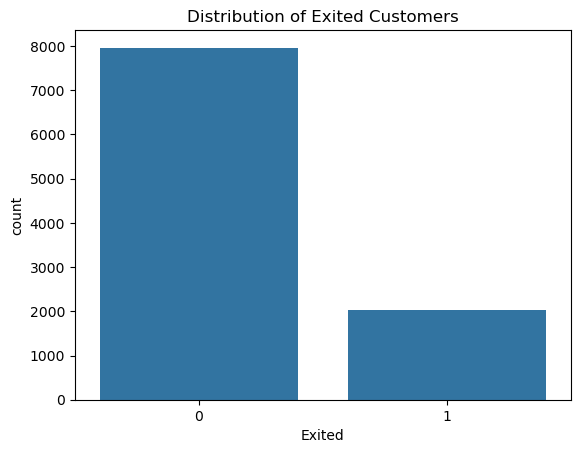

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


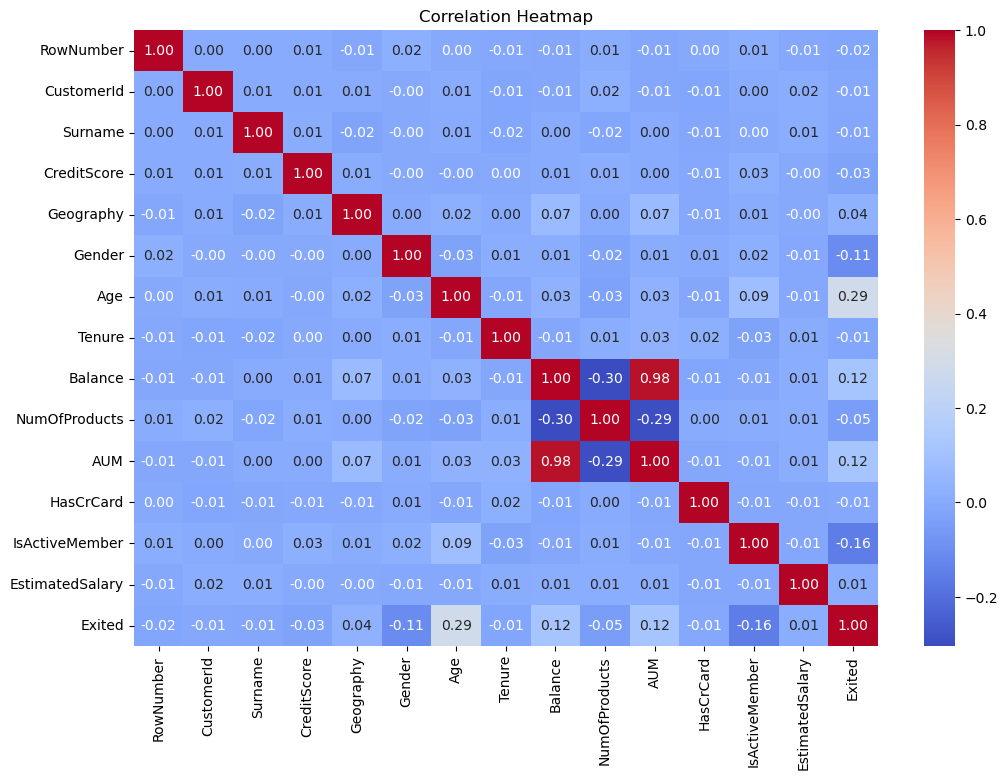

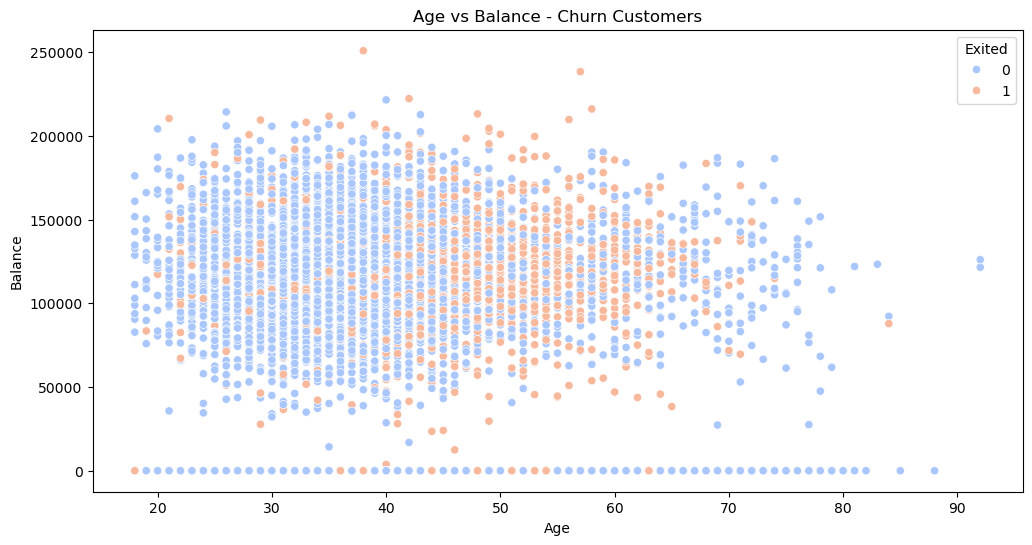

In [28]:
# Statistical summary
print(df.describe())

# Visualizing the distribution of the target variable ('Exited')
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited Customers')
plt.show()

# Proportion of customers who has exited the bank
print(df['Exited'].value_counts(normalize=True) * 100)

# Correlation heatmap to see the relationship between numeric variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualize the relationship between age and balance for exited vs not exited customers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, palette='coolwarm')
plt.title('Age vs Balance - Churn Customers')
plt.show()


In [32]:
# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target 
X = df_encoded.drop('Exited', axis=1)  # Features
y = df_encoded['Exited']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
# Evaluate the model
print(f"Model accuracy: {model.score(X_test, y_test)}")

Model accuracy: 0.866


In [34]:
# Calculate feature importance for predictive modeling

# Separate features and target
X = df_encoded.drop('Exited', axis=1) #features
y = df_encoded['Exited'] #target

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier to assess feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [42]:
# Feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})
# Exclude ID columns
excluded_features = ['CustomerId', 'RowNumber','Surname']
filtered_importances = importances[~importances['Feature'].isin(excluded_features)]

# Get top 5 meaningful features
top5_filtered = filtered_importances.sort_values(by='Importance', ascending=False).head(5)

# Display top important features
print(top5_filtered)

            Feature  Importance
6               Age    0.194132
9     NumOfProducts    0.117218
10              AUM    0.088360
13  EstimatedSalary    0.080803
3       CreditScore    0.078266


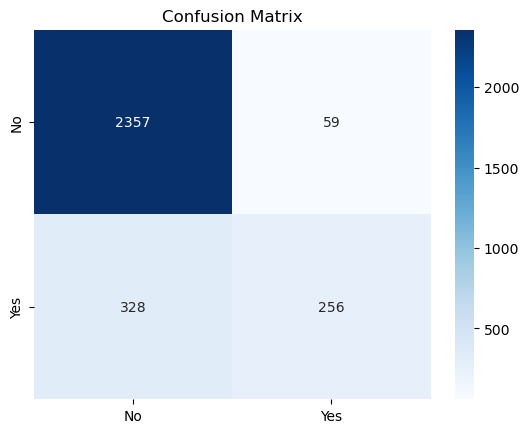

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      2416
           1       0.81      0.44      0.57       584

    accuracy                           0.87      3000
   macro avg       0.85      0.71      0.75      3000
weighted avg       0.87      0.87      0.86      3000



In [45]:
# Predict on test data
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [58]:
# Save as csv file
top5_filtered.to_csv("top5_imp_churn.csv", index=False)

### Conclusions:
Based on feature importance and analysis, The most important factors affecting customer churn are:
- 'Age',
- 'NumOfProducts'
- 'AUM'
- 'EstimatedSalary'
- 'CreditScore'.

### Future Analysis: 

- Apply clustering to uncover customer segments for even more tailored targeting.

- Track churn probability scores to proactively prevent high-risk customer loss.

- Using Tableau to built a dashboard. 




